In [68]:
import root_config as rc

rc.configure()

from detectdd.auth_bigquery import BigQueryClient
from detectdd.serializer import Serializer

try:
    cohort = Serializer().read_cohort()  # need to run 01-cohort.ipynb to produce the cohort
except FileNotFoundError:
    raise Exception("Need to run [01-cohort.ipynb] at least once to create the cohort file in the /out directory")


big_query = BigQueryClient.auth()

cohort.describe()

Loaded cohort from ..\out\cohort-full.out
<google.oauth2.credentials.Credentials object at 0x0000019D9E69DD50> lucky-curve-395616


,subject_id,hadm_id,stay_id,dose_b_time,event_count,num_icd_codes
count,23914.0,23914.0,23914.0,23914,23914.0,23914.0
mean,14954428.31768,25045222.198628,34992124.112445,2154-08-20 00:55:48.044660,3.021117,1.840554
min,10001884.0,20022095.0,30002654.0,2110-02-10 06:30:00,0.0,1.0
25%,12422071.0,22572183.0,32500877.0,2134-04-27 01:51:45,1.0,1.0
50%,15016435.0,25099207.0,34953703.0,2154-10-18 21:53:00,2.0,1.0
75%,17444849.0,27581747.0,37502590.0,2175-05-31 08:28:00,4.0,2.0
max,19995595.0,29997500.0,39995213.0,2209-05-30 09:27:00,17.0,10.0
std,2884908.187019,2887619.009191,2888908.906473,NaN,2.558023,1.103194


In [69]:
import pandas as pd

kidney_data = pd.read_csv('kidney-data-before-and-after.csv')

pivot_kidney_data = kidney_data.pivot_table(index=['subject_id', 'dose_b_time', 'hadm_id','chart_time'], 
                                            columns='item_id', 
                                            values='lab_value', 
                                            aggfunc='first').reset_index()

pivot_kidney_data.columns = [str(col) for col in pivot_kidney_data.columns]



In [70]:
unique_item_ids = kidney_data['item_id'].unique()

print(unique_item_ids)

[51007 52024]


In [71]:
pivot_kidney_data

,subject_id,dose_b_time,hadm_id,chart_time,51007,52024
0,10005817,2135-01-04 10:40:00,28661809.0,2135-01-04 04:33:00,8.9,NaN
1,10005817,2135-01-17 18:00:00,28661809.0,2135-01-18 01:20:00,0.6,NaN
2,10005817,2135-01-17 20:25:00,28661809.0,2135-01-18 01:20:00,0.6,NaN
3,10005817,2135-01-17 21:26:00,28661809.0,2135-01-18 01:20:00,0.6,NaN
4,10005817,2135-01-18 21:07:00,28661809.0,2135-01-19 05:00:00,1.3,NaN
...,...,...,...,...,...,...
971,19639556,2148-07-29 11:00:00,28378789.0,2148-07-29 11:06:00,6.3,NaN
972,19639556,2148-07-29 20:06:00,28378789.0,2148-07-29 11:06:00,6.3,NaN
973,19764001,2124-01-17 01:41:00,23101422.0,2124-01-17 03:46:00,12.9,NaN
974,19764001,2124-01-17 15:14:00,23101422.0,2124-01-17 03:46:00,12.9,NaN


In [72]:
cohort

,subject_id,hadm_id,stay_id,drug_a_item_id,drug_b_item_id,dose_b_time,event_count,num_icd_codes,icd_code,icd_versions,icd_titles
110,14737153,29946843,33029775,225798,225893,2165-05-03 08:00:00,7,1,[N170],[10],Acute kidney failure with tubular necrosis
111,14737153,29946843,33029775,225798,225893,2165-04-27 15:26:00,7,1,[N170],[10],Acute kidney failure with tubular necrosis
112,14737153,29946843,33029775,225798,225893,2165-04-28 00:12:00,7,1,[N170],[10],Acute kidney failure with tubular necrosis
132,16328100,23215258,39800833,225798,225893,2131-10-26 18:30:00,10,1,[T451X5A],[10],Adverse effect of antineoplastic and immunosup...
146,11399516,24843518,39422318,225798,225893,2148-08-22 04:36:00,5,1,[N179],[10],"Acute kidney failure, unspecified"
...,...,...,...,...,...,...,...,...,...,...,...
202813,13902474,21569738,31810329,AcetaZOLamide,Aspirin,2115-11-04 09:11:00,0,4,"[T424X5A, N189, D62, N179]",[10],"Adverse effect of benzodiazepines, initial enc..."
202815,13902474,21569738,31810329,Aspirin,AcetaZOLamide,2115-11-04 13:24:00,0,4,"[T424X5A, N189, D62, N179]",[10],"Adverse effect of benzodiazepines, initial enc..."
202816,19485979,22683071,30831760,AcetaZOLamide,Aspirin,2115-06-03 08:53:00,0,1,[E861],[10],Hypovolemia
202817,19718027,27822154,34554443,CARVedilol,EPINEPHrine,2185-04-30 19:04:00,0,2,"[N179, D62]",[10],"Acute kidney failure, unspecified,Acute posthe..."


In [73]:
merged_kidney_data = pivot_kidney_data.merge(cohort[['subject_id', 'stay_id']], on='subject_id', how='left')

print(merged_kidney_data.head())


   subject_id          dose_b_time     hadm_id           chart_time  51007  \
0    10005817  2135-01-04 10:40:00  28661809.0  2135-01-04 04:33:00    8.9   
1    10005817  2135-01-04 10:40:00  28661809.0  2135-01-04 04:33:00    8.9   
2    10005817  2135-01-04 10:40:00  28661809.0  2135-01-04 04:33:00    8.9   
3    10005817  2135-01-04 10:40:00  28661809.0  2135-01-04 04:33:00    8.9   
4    10005817  2135-01-04 10:40:00  28661809.0  2135-01-04 04:33:00    8.9   

   52024   stay_id  
0    NaN  31316840  
1    NaN  31316840  
2    NaN  31316840  
3    NaN  31316840  
4    NaN  31316840  


In [74]:
ordered_cols = ['stay_id', 'dose_b_time', 'subject_id', 'chart_time'] + [col for col in merged_kidney_data.columns if col not in ['stay_id', 'dose_b_time', 'subject_id', 'chart_time']]
merged_kidney_data = merged_kidney_data[ordered_cols]


print(merged_kidney_data.head())



    stay_id          dose_b_time  subject_id           chart_time     hadm_id  \
0  31316840  2135-01-04 10:40:00    10005817  2135-01-04 04:33:00  28661809.0   
1  31316840  2135-01-04 10:40:00    10005817  2135-01-04 04:33:00  28661809.0   
2  31316840  2135-01-04 10:40:00    10005817  2135-01-04 04:33:00  28661809.0   
3  31316840  2135-01-04 10:40:00    10005817  2135-01-04 04:33:00  28661809.0   
4  31316840  2135-01-04 10:40:00    10005817  2135-01-04 04:33:00  28661809.0   

   51007  52024  
0    8.9    NaN  
1    8.9    NaN  
2    8.9    NaN  
3    8.9    NaN  
4    8.9    NaN  


In [75]:
merged_kidney_data = merged_kidney_data.drop(columns=['hadm_id'])
merged_kidney_data

,stay_id,dose_b_time,subject_id,chart_time,51007,52024
0,31316840,2135-01-04 10:40:00,10005817,2135-01-04 04:33:00,8.9,NaN
1,31316840,2135-01-04 10:40:00,10005817,2135-01-04 04:33:00,8.9,NaN
2,31316840,2135-01-04 10:40:00,10005817,2135-01-04 04:33:00,8.9,NaN
3,31316840,2135-01-04 10:40:00,10005817,2135-01-04 04:33:00,8.9,NaN
4,31316840,2135-01-04 10:40:00,10005817,2135-01-04 04:33:00,8.9,NaN
...,...,...,...,...,...,...
8880,36588381,2162-02-23 02:14:00,19808487,2162-02-22 21:50:00,10.7,NaN
8881,36588381,2162-02-23 02:14:00,19808487,2162-02-22 21:50:00,10.7,NaN
8882,36588381,2162-02-23 02:14:00,19808487,2162-02-22 21:50:00,10.7,NaN
8883,36588381,2162-02-23 02:14:00,19808487,2162-02-22 21:50:00,10.7,NaN


In [76]:
merged_kidney_data = merged_kidney_data.rename(columns={
    'chart_time': 'charttime',
    '52024': 'creatinine',
    '51007': 'uric acid'
})

merged_kidney_data

,stay_id,dose_b_time,subject_id,charttime,uric acid,creatinine
0,31316840,2135-01-04 10:40:00,10005817,2135-01-04 04:33:00,8.9,NaN
1,31316840,2135-01-04 10:40:00,10005817,2135-01-04 04:33:00,8.9,NaN
2,31316840,2135-01-04 10:40:00,10005817,2135-01-04 04:33:00,8.9,NaN
3,31316840,2135-01-04 10:40:00,10005817,2135-01-04 04:33:00,8.9,NaN
4,31316840,2135-01-04 10:40:00,10005817,2135-01-04 04:33:00,8.9,NaN
...,...,...,...,...,...,...
8880,36588381,2162-02-23 02:14:00,19808487,2162-02-22 21:50:00,10.7,NaN
8881,36588381,2162-02-23 02:14:00,19808487,2162-02-22 21:50:00,10.7,NaN
8882,36588381,2162-02-23 02:14:00,19808487,2162-02-22 21:50:00,10.7,NaN
8883,36588381,2162-02-23 02:14:00,19808487,2162-02-22 21:50:00,10.7,NaN


In [77]:
vitals_data = pd.read_csv('vitals_data.csv')

merged_data = pd.merge(vitals_data, merged_kidney_data, on=['stay_id', 'dose_b_time', 'subject_id', 'charttime'], how='left')

merged_data

,stay_id,dose_b_time,subject_id,charttime,heart_rate,sbp,dbp,mbp,uric acid,creatinine
0,30004144,2126-04-07 11:46:00,10369174,2126-04-07 21:10:00,60.0,NaN,NaN,NaN,NaN,NaN
1,30004144,2126-04-07 11:46:00,10369174,2126-04-07 21:00:00,62.0,129.0,50.0,71.0,NaN,NaN
2,30004144,2126-04-07 11:46:00,10369174,2126-04-07 14:00:00,60.0,135.0,57.0,80.0,NaN,NaN
3,30004144,2126-04-07 11:46:00,10369174,2126-04-07 22:10:00,60.0,NaN,NaN,NaN,NaN,NaN
4,30004144,2126-04-07 11:46:00,10369174,2126-04-07 17:00:00,68.0,153.0,69.0,96.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
248096,39966562,2155-12-23 12:47:00,12031993,2155-12-23 13:15:00,80.0,100.0,47.0,63.0,NaN,NaN
248097,39966562,2155-12-23 12:47:00,12031993,2155-12-23 18:15:00,81.0,95.0,54.0,68.0,NaN,NaN
248098,39966562,2155-12-23 12:47:00,12031993,2155-12-23 14:30:00,85.0,106.0,51.0,68.0,NaN,NaN
248099,39966562,2155-12-23 12:47:00,12031993,2155-12-23 14:15:00,81.0,111.0,51.0,69.0,NaN,NaN


In [78]:
missing_values = merged_data.isnull().sum()
print(missing_values)

stay_id             0
dose_b_time         0
subject_id          0
charttime           0
heart_rate      76960
sbp             73685
dbp             73716
mbp             73441
uric acid      247978
creatinine     248082
dtype: int64


In [79]:
cols_to_fill = ['heart_rate', 'sbp', 'dbp', 'mbp', 'uric acid', 'creatinine']

for col in cols_to_fill:
    merged_data[col].fillna(method='ffill', inplace=True)
    merged_data[col].fillna(method='bfill', inplace=True)

merged_data


,stay_id,dose_b_time,subject_id,charttime,heart_rate,sbp,dbp,mbp,uric acid,creatinine
0,30004144,2126-04-07 11:46:00,10369174,2126-04-07 21:10:00,60.0,129.0,50.0,71.0,1.9,2.2
1,30004144,2126-04-07 11:46:00,10369174,2126-04-07 21:00:00,62.0,129.0,50.0,71.0,1.9,2.2
2,30004144,2126-04-07 11:46:00,10369174,2126-04-07 14:00:00,60.0,135.0,57.0,80.0,1.9,2.2
3,30004144,2126-04-07 11:46:00,10369174,2126-04-07 22:10:00,60.0,135.0,57.0,80.0,1.9,2.2
4,30004144,2126-04-07 11:46:00,10369174,2126-04-07 17:00:00,68.0,153.0,69.0,96.0,1.9,2.2
...,...,...,...,...,...,...,...,...,...,...
248096,39966562,2155-12-23 12:47:00,12031993,2155-12-23 13:15:00,80.0,100.0,47.0,63.0,1.3,2.2
248097,39966562,2155-12-23 12:47:00,12031993,2155-12-23 18:15:00,81.0,95.0,54.0,68.0,1.3,2.2
248098,39966562,2155-12-23 12:47:00,12031993,2155-12-23 14:30:00,85.0,106.0,51.0,68.0,1.3,2.2
248099,39966562,2155-12-23 12:47:00,12031993,2155-12-23 14:15:00,81.0,111.0,51.0,69.0,1.3,2.2


In [80]:
print(merged_data.describe())

            stay_id    subject_id     heart_rate            sbp  \
count  2.481010e+05  2.481010e+05  248101.000000  248101.000000   
mean   3.502607e+07  1.496950e+07      88.306889     114.880109   
std    2.880106e+06  2.839218e+06      19.202486      21.632825   
min    3.000414e+07  1.000188e+07       1.000000      12.000000   
25%    3.254031e+07  1.250419e+07      75.000000     100.000000   
50%    3.499260e+07  1.499863e+07      87.000000     112.000000   
75%    3.755584e+07  1.740533e+07     100.000000     128.000000   
max    3.998748e+07  1.999560e+07     254.000000     336.000000   

                 dbp            mbp      uric acid     creatinine  
count  248101.000000  248101.000000  248101.000000  248101.000000  
mean       62.236004      76.849510       5.850682       2.167065  
std        14.562091      15.512995       3.752114       0.203340  
min         8.000000       1.000000       1.100000       1.300000  
25%        52.000000      67.000000       3.000000      

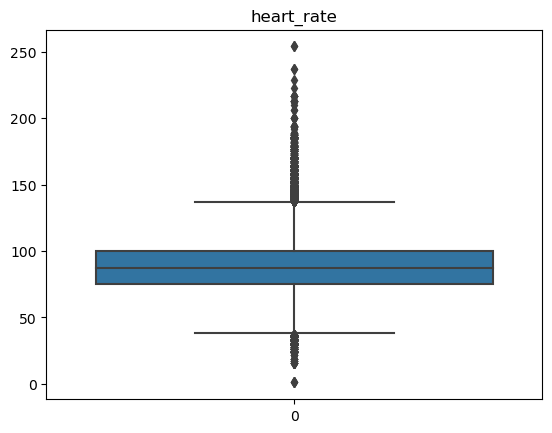

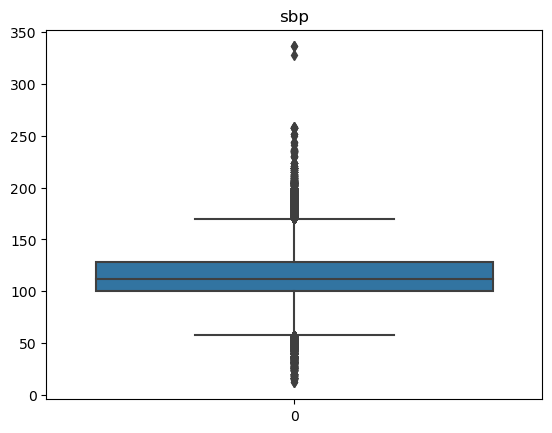

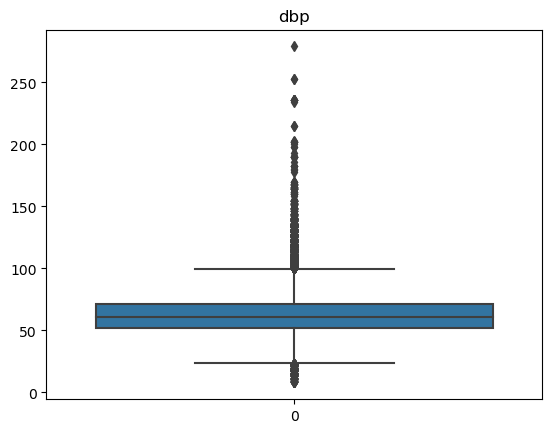

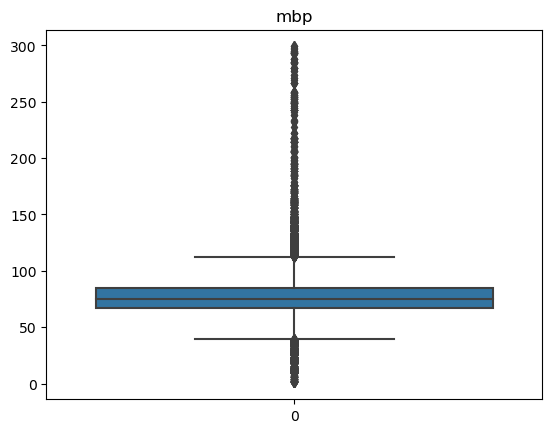

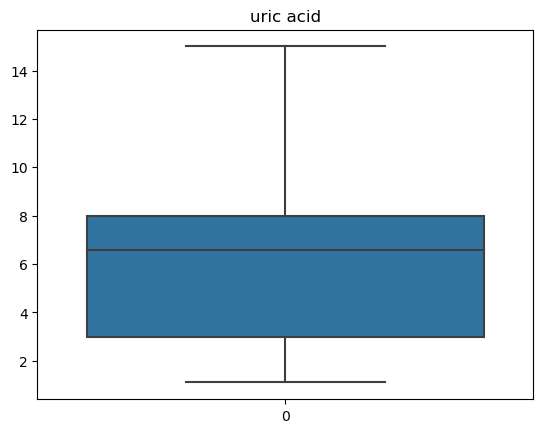

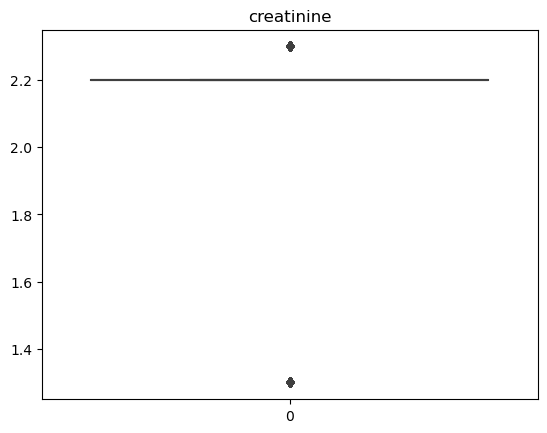

In [81]:
import matplotlib.pyplot as plt
import seaborn as sns

for col in ['heart_rate', 'sbp', 'dbp', 'mbp', 'uric acid', 'creatinine']:
    sns.boxplot(merged_data[col])
    plt.title(col)
    plt.show()


In [82]:
merged_data = merged_data[(merged_data['dbp'] != 8) & (merged_data['dbp'] != 279)]
merged_data = merged_data[merged_data['uric acid'] != 15]
merged_data = merged_data[(merged_data['heart_rate'] >= 50) & (merged_data['heart_rate'] <= 150)]
merged_data = merged_data[(merged_data['sbp'] >= 70) & (merged_data['sbp'] <= 200)]

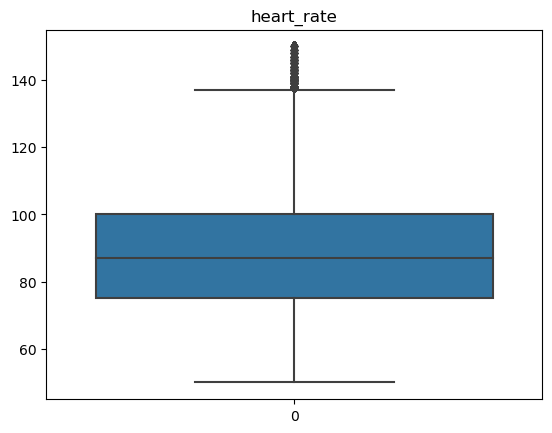

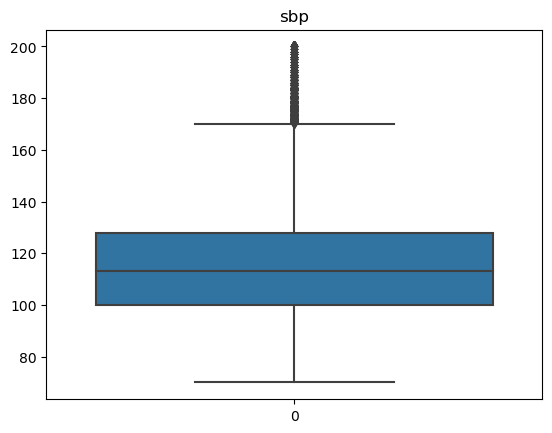

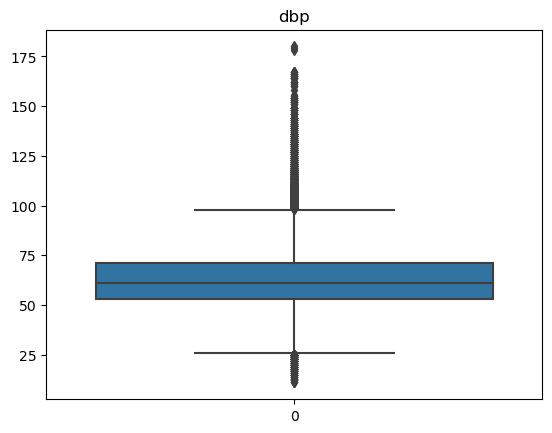

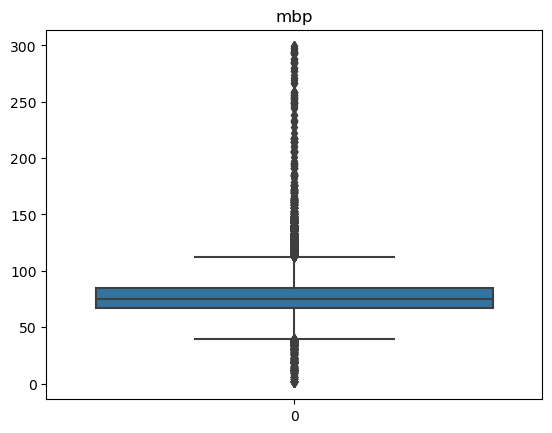

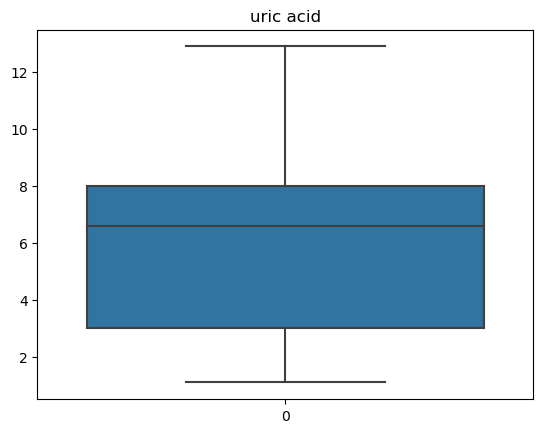

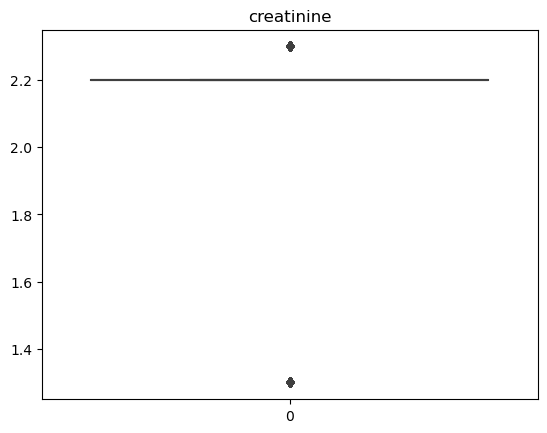

In [83]:
for col in ['heart_rate', 'sbp', 'dbp', 'mbp', 'uric acid', 'creatinine']:
    sns.boxplot(merged_data[col])
    plt.title(col)
    plt.show()

In [84]:
print(merged_data.describe())

            stay_id    subject_id     heart_rate            sbp  \
count  2.362100e+05  2.362100e+05  236210.000000  236210.000000   
mean   3.492717e+07  1.497355e+07      88.388631     115.397859   
std    2.855920e+06  2.840828e+06      18.153534      20.675077   
min    3.000414e+07  1.000188e+07      50.000000      70.000000   
25%    3.247667e+07  1.249896e+07      75.000000     100.000000   
50%    3.485573e+07  1.500373e+07      87.000000     113.000000   
75%    3.733810e+07  1.741356e+07     100.000000     128.000000   
max    3.998748e+07  1.999560e+07     150.000000     200.000000   

                 dbp            mbp      uric acid     creatinine  
count  236210.000000  236210.000000  236210.000000  236210.000000  
mean       62.453498      77.134858       5.613124       2.166733  
std        14.246199      15.012764       3.500526       0.204793  
min        11.000000       1.000000       1.100000       1.300000  
25%        53.000000      67.000000       3.000000      

In [85]:
merged_data = merged_data[merged_data['dbp'] >= 30]
merged_data = merged_data[merged_data['dbp'] < 165]
merged_data = merged_data[merged_data['mbp'] >= 30]
merged_data = merged_data[merged_data['uric acid'] <= 10]

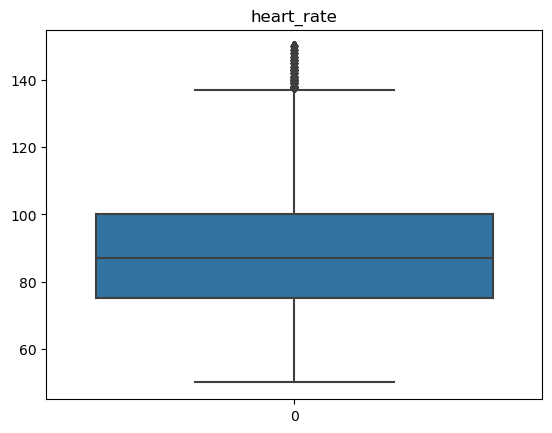

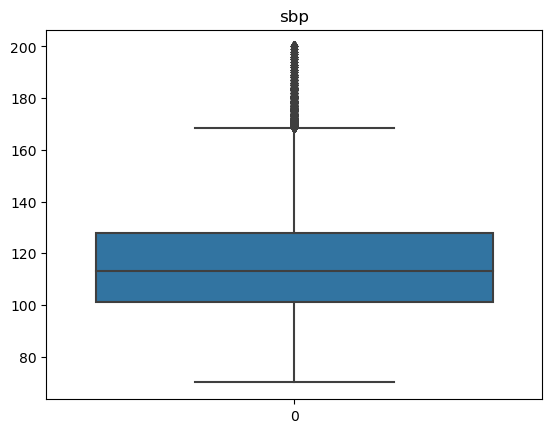

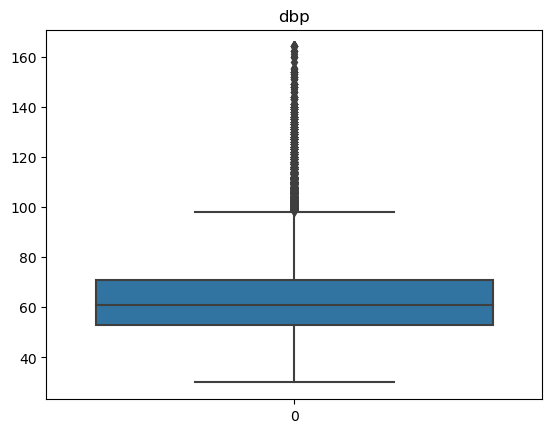

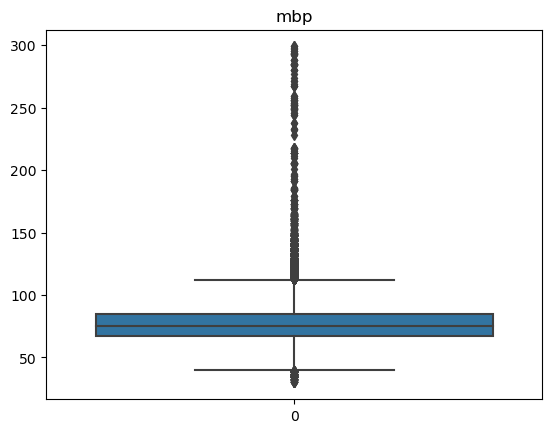

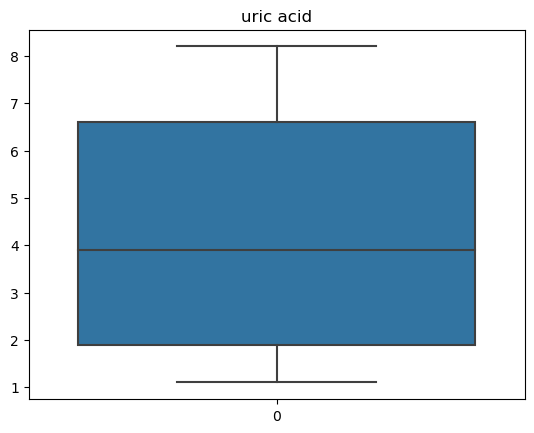

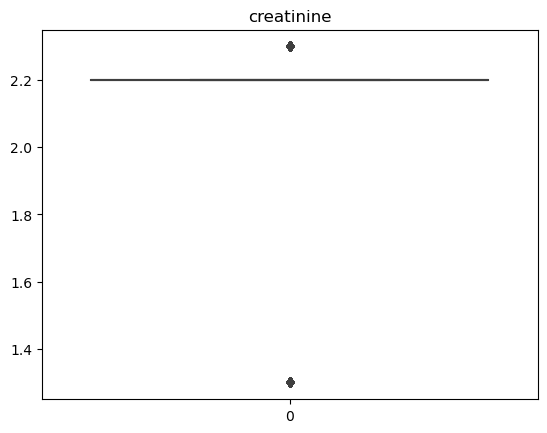

In [86]:
for col in ['heart_rate', 'sbp', 'dbp', 'mbp', 'uric acid', 'creatinine']:
    sns.boxplot(merged_data[col])
    plt.title(col)
    plt.show()

In [87]:
merged_data

,stay_id,dose_b_time,subject_id,charttime,heart_rate,sbp,dbp,mbp,uric acid,creatinine
0,30004144,2126-04-07 11:46:00,10369174,2126-04-07 21:10:00,60.0,129.0,50.0,71.0,1.9,2.2
1,30004144,2126-04-07 11:46:00,10369174,2126-04-07 21:00:00,62.0,129.0,50.0,71.0,1.9,2.2
2,30004144,2126-04-07 11:46:00,10369174,2126-04-07 14:00:00,60.0,135.0,57.0,80.0,1.9,2.2
3,30004144,2126-04-07 11:46:00,10369174,2126-04-07 22:10:00,60.0,135.0,57.0,80.0,1.9,2.2
4,30004144,2126-04-07 11:46:00,10369174,2126-04-07 17:00:00,68.0,153.0,69.0,96.0,1.9,2.2
...,...,...,...,...,...,...,...,...,...,...
248096,39966562,2155-12-23 12:47:00,12031993,2155-12-23 13:15:00,80.0,100.0,47.0,63.0,1.3,2.2
248097,39966562,2155-12-23 12:47:00,12031993,2155-12-23 18:15:00,81.0,95.0,54.0,68.0,1.3,2.2
248098,39966562,2155-12-23 12:47:00,12031993,2155-12-23 14:30:00,85.0,106.0,51.0,68.0,1.3,2.2
248099,39966562,2155-12-23 12:47:00,12031993,2155-12-23 14:15:00,81.0,111.0,51.0,69.0,1.3,2.2


In [88]:
merged_data.to_csv('vitals_kidney_data.csv', index=False)